In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models,Model

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/Data/"

dataset = pd.read_csv(path + 'imdb.csv')
dataset

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [4]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocessing_text(text):
    # Remove html tag
    sentence = remove_tags(text)
    # Remove link
    sentence = re.sub(r'https:\/\/[a-zA-Z]*\.com',' ',sentence)
    # Remove number
    sentence = re.sub(r'\d+',' ',sentence)
    # Remove white space
    sentence = re.sub(r'\s+',' ',sentence)
    # Remove single character
    sentence = re.sub(r"\b[a-zA-Z]\b", ' ', sentence)
    # Remove bracket
    sentence = re.sub(r'\W+',' ',sentence)
    # Make sentence lowercase
    sentence = sentence.lower()
    return sentence

In [5]:
pre_proces_sen = []
sentences = list(dataset['review'])
for sen in sentences:
    pre_proces_sen.append(preprocessing_text(sen))

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
stop = ['has', 'its', "needn't", 'm', "wouldn't", 'but', 'he', "mustn't", 'his', 'there', 'or', "won't", 'can', 'd', "hadn't", 'how', 'hasn', 'very', 'wouldn', 'own', "doesn't", 'their', "isn't", 'an', "haven't", "wasn't", 'those', 'once', "shan't", 'when', "aren't", 've', 'it', "it's", 'of', "don't", 'and', 'down', 'yours', 'to', 'over', "she's", 'we', 'they', 'haven', 'having', 'ain', 'no', 'her', 'you', 'then', 'just', 'didn', 'into', 'before', 'shouldn', 'here', 'yourselves', 's', 'will', 'which', 'are', 'who', 'with', "you'd", 'this', 'me', 'themselves', "you've", 'hadn', 'mightn', 'she', 'o', 'more', 'whom', 'for', 'him', 'again', 'below', 'few', 'most', 'been', 'such', 'shan', 'is', 'ourselves', 'y', 'by', 'being', 'in', 'mustn', "you'll", 'herself', 'yourself', 'ours', 'between', 'had', 'other', "should've", 't', 'isn', 'them', 'himself', 're', 'doing', 'only', 'where', 'your', 'after', 'so', 'll', 'against', 'the', 'about', 'each', 'aren', 'wasn', "couldn't", 'have', 'ma', 'i', 'my', "mightn't", 'as', 'from', 'itself', 'under', 'same', 'why', 'any', 'our', 'be', 'off', "hasn't", 'through', "you're", 'was', 'did', "shouldn't", 'myself', 'some', 'theirs', 'hers', 'further', 'do', 'now', 'than', 'too', 'during', 'at', 'because', 'doesn', 'needn', "weren't", 'don', "didn't", 'couldn', 'what', 'does', 'if', 'up', 'on', 'these', 'should', 'all', "that'll", 'above', 'weren', 'that', 'a', 'while', 'both', 'until', 'were', 'am']

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
for i in range(len(pre_proces_sen)):
    x = pre_proces_sen[i]
    x = word_tokenize(x)
    new_x_list = [word for word in x if word not in stop]
    pre_proces_sen[i] = ' '.join(new_x_list)
    if i% 2000 == 0:
        print(i,end=" ")

0 2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 22000 24000 26000 28000 30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 

In [10]:
print(pre_proces_sen[2])

thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize not match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may not crown jewel career wittier devil wears prada interesting superman great comedy go see friends


In [11]:
y  = dataset['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [12]:
X = pre_proces_sen

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

92789


In [ ]:
!brew install wget

wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

SyntaxError: ignored

In [16]:
import gensim
#WORD2VEC_MODEL = "../input/one-lac-bin/model_1_lac.bin"
#load word2vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=100000)

In [17]:
embedding_weights = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_weights[index] = word2vec[word]
    except:
        pass 

In [18]:
print(word2vec['not'][:40])

[ 0.08496094 -0.09521484  0.11914062  0.11181641 -0.11132812  0.04980469
  0.11425781 -0.09863281  0.09960938 -0.04150391  0.01287842 -0.18164062
 -0.11621094  0.02380371 -0.1640625   0.12695312  0.12060547  0.00946045
  0.04150391 -0.09521484 -0.12988281 -0.11523438  0.07519531 -0.04980469
  0.06591797 -0.02905273 -0.08984375  0.08447266 -0.04785156 -0.02709961
 -0.10302734  0.11083984  0.01422119 -0.09863281  0.04125977  0.07226562
  0.10986328  0.01135254 -0.01483154  0.0456543 ]


In [19]:
def get_model(_rnn_nb, _fc_nb):
spec_start = Input((256,256))
 spec_x = spec_start
 for _r in _rnn_nb:
 spec_x = GRU(_r, activation=’tanh’, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)(spec_x)
for _f in _fc_nb:
 spec_x = TimeDistributed(Dense(_f))(spec_x)
 spec_x = Dropout(dropout_rate)(spec_x)
spec_x = TimeDistributed(Dense(10))(spec_x)
 out = Activation(‘sigmoid’, name=’strong_out’)(spec_x)
_model = Model(inputs=spec_start, outputs=out)
 _model.compile(optimizer=’Adam’, loss=’binary_crossentropy’,metrics = [‘accuracy’])
 _model.summary()
 return _model

IndentationError: ignored

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_weights], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          27836700  
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 28,056,477
Trainable params: 219,777
Non-trainable params: 27,836,700
_________________________________________________________________
None


In [ ]:
history =  model.fit(X_train, y_train,  batch_size=128, epochs=8, validation_split=0.2,verbose=1)

Epoch 1/8
 72/250 [=======>......................] - ETA: 1:05 - loss: 0.5010 - acc: 0.7522

In [21]:
!pip install d2l==0.17.0

     |████████████████████████████████| 83 kB 1.3 MB/s 


In [22]:
import tensorflow as tf
from d2l import tensorflow as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [23]:
def get_params(vocab_size, num_hiddens):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return tf.random.normal(shape=shape, stddev=0.01, mean=0,
                                dtype=tf.float32)

    def three():
        return (tf.Variable(normal((num_inputs, num_hiddens)),
                            dtype=tf.float32),
                tf.Variable(normal((num_hiddens, num_hiddens)),
                            dtype=tf.float32),
                tf.Variable(tf.zeros(num_hiddens), dtype=tf.float32))

    W_xz, W_hz, b_z = three()  # Update gate parameters
    W_xr, W_hr, b_r = three()  # Reset gate parameters
    W_xh, W_hh, b_h = three()  # Candidate hidden state parameters
    # Output layer parameters
    W_hq = tf.Variable(normal((num_hiddens, num_outputs)), dtype=tf.float32)
    b_q = tf.Variable(tf.zeros(num_outputs), dtype=tf.float32)
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]
    return params

In [24]:
def init_gru_state(batch_size, num_hiddens):
    return (tf.zeros((batch_size, num_hiddens)),)

In [25]:
def gru(inputs, state, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    for X in inputs:
        X = tf.reshape(X, [-1, W_xh.shape[0]])
        Z = tf.sigmoid(tf.matmul(X, W_xz) + tf.matmul(H, W_hz) + b_z)
        R = tf.sigmoid(tf.matmul(X, W_xr) + tf.matmul(H, W_hr) + b_r)
        H_tilda = tf.tanh(tf.matmul(X, W_xh) + tf.matmul(R * H, W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = tf.matmul(H, W_hq) + b_q
        outputs.append(Y)
    return tf.concat(outputs, axis=0), (H,)

perplexity 8.9, 5090.6 tokens/sec on /CPU:0
time traveller and the the the the the the the the the the the t
traveller and the the the the the the the the the the the t


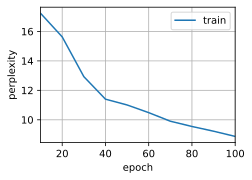

In [27]:
vocab_size, num_hiddens, device_name = len(
    vocab), 256, d2l.try_gpu()._device_name
# defining tensorflow training strategy
strategy = tf.distribute.OneDeviceStrategy(device_name)
num_epochs, lr = 100, 1
with strategy.scope():
    model = d2l.RNNModelScratch(len(vocab), num_hiddens, init_gru_state, gru,
                                get_params)

d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, strategy)

perplexity 7.4, 5495.4 tokens/sec on /CPU:0
time traveller the the the the the the the the the the the the t
traveller the the the the the the the the the the the the t


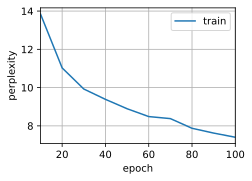

In [28]:
gru_cell = tf.keras.layers.GRUCell(num_hiddens,
                                   kernel_initializer='glorot_uniform')
gru_layer = tf.keras.layers.RNN(gru_cell, time_major=True,
                                return_sequences=True, return_state=True)

device_name = d2l.try_gpu()._device_name
strategy = tf.distribute.OneDeviceStrategy(device_name)
with strategy.scope():
    model = d2l.RNNModel(gru_layer, vocab_size=len(vocab))

d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, strategy)